In [5]:
!pip install gdown
!pip install ftfy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 KB 882.9 kB/s eta 0:00:00MB/s eta 0:00:01


In [1]:
import numpy as np
from clip.model import OnnxClip
from sam.model import OnnxSAM
sam_model = OnnxSAM()
clip_model = OnnxClip()


INFO:root:Available providers for ONNXRuntime: CPUExecutionProvider
INFO:root:Available providers for ONNXRuntime: CPUExecutionProvider


In [1]:
from clip.model import OnnxClip, softmax, get_similarity_scores
from PIL import Image

images = [Image.open("dog.jpg").convert("RGB")]
texts = ["a photo of a man", "a photo of a woman", "s photo of a dog"]

# Your images/texts will get split into batches of this size before being
# passed to CLIP, to limit memory usage
onnx_model = OnnxClip(batch_size=16, type='siglip')

# Unlike the original CLIP, there is no need to run tokenization/preprocessing
# separately - simply run get_image_embeddings directly on PIL images/NumPy
# arrays, and run get_text_embeddings directly on strings.
image_embeddings = onnx_model.get_image_embeddings(images)
text_embeddings = onnx_model.get_text_embeddings(texts)

# To use the embeddings for zero-shot classification, you can use these two
# functions. Here we run on a single image, but any number is supported.
logits = get_similarity_scores(image_embeddings, {"ct1": text_embeddings})
probabilities = softmax(logits['ct1'])

print("Logits:", logits)

for text, p in zip(texts, probabilities[0]):
    print(f"Probability that the image is '{text}': {p:.3f}")


INFO:root:Available providers for ONNXRuntime: CPUExecutionProvider


(1, 3, 384, 384)
eeeeeey
(3, 77)


2024-06-19 17:25:59.832027675 [E:onnxruntime:, sequential_executor.cc:514 ExecuteKernel] Non-zero status code returned while running Gather node. Name:'/text_model/embeddings/token_embedding/Gather' Status Message: indices element out of data bounds, idx=49406 must be within the inclusive range [-32000,31999]


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Non-zero status code returned while running Gather node. Name:'/text_model/embeddings/token_embedding/Gather' Status Message: indices element out of data bounds, idx=49406 must be within the inclusive range [-32000,31999]

In [ ]:
def encode_text_with_prompt_ensemble(model, texts, device, prompt_templates=None):

    # using default prompt templates for ImageNet
    if prompt_templates == None:
        prompt_templates = ['a bad photo of a {}.', 'a photo of many {}.', 'a sculpture of a {}.', 'a photo of the hard to see {}.', 'a low resolution photo of the {}.', 'a rendering of a {}.', 'graffiti of a {}.', 'a bad photo of the {}.', 'a cropped photo of the {}.', 'a tattoo of a {}.', 'the embroidered {}.', 'a photo of a hard to see {}.', 'a bright photo of a {}.', 'a photo of a clean {}.', 'a photo of a dirty {}.', 'a dark photo of the {}.', 'a drawing of a {}.', 'a photo of my {}.', 'the plastic {}.', 'a photo of the cool {}.', 'a close-up photo of a {}.', 'a black and white photo of the {}.', 'a painting of the {}.', 'a painting of a {}.', 'a pixelated photo of the {}.', 'a sculpture of the {}.', 'a bright photo of the {}.', 'a cropped photo of a {}.', 'a plastic {}.', 'a photo of the dirty {}.', 'a jpeg corrupted photo of a {}.', 'a blurry photo of the {}.', 'a photo of the {}.', 'a good photo of the {}.', 'a rendering of the {}.', 'a {} in a video game.', 'a photo of one {}.', 'a doodle of a {}.', 'a close-up photo of the {}.', 'a photo of a {}.', 'the origami {}.', 'the {} in a video game.', 'a sketch of a {}.', 'a doodle of the {}.', 'a origami {}.', 'a low resolution photo of a {}.', 'the toy {}.', 'a rendition of the {}.', 'a photo of the clean {}.', 'a photo of a large {}.', 'a rendition of a {}.', 'a photo of a nice {}.', 'a photo of a weird {}.', 'a blurry photo of a {}.', 'a cartoon {}.', 'art of a {}.', 'a sketch of the {}.', 'a embroidered {}.', 'a pixelated photo of a {}.', 'itap of the {}.', 'a jpeg corrupted photo of the {}.', 'a good photo of a {}.', 'a plushie {}.', 'a photo of the nice {}.', 'a photo of the small {}.', 'a photo of the weird {}.', 'the cartoon {}.', 'art of the {}.', 'a drawing of the {}.', 'a photo of the large {}.', 'a black and white photo of a {}.', 'the plushie {}.', 'a dark photo of a {}.', 'itap of a {}.', 'graffiti of the {}.', 'a toy {}.', 'itap of my {}.', 'a photo of a cool {}.', 'a photo of a small {}.', 'a tattoo of the {}.', 'there is a {} in the scene.', 'there is the {} in the scene.', 'this is a {} in the scene.', 'this is the {} in the scene.', 'this is one {} in the scene.']

    text_features = []
    for t in texts:
        prompted_t = [template.format(t) for template in prompt_templates]
        prompted_t = tokenize(prompted_t).to(device)
        class_embeddings = model.encode_text(prompted_t)
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        class_embedding = class_embeddings.mean(dim=0)
        class_embedding /= class_embedding.norm()
        text_features.append(class_embedding)
    text_features = torch.stack(text_features, dim=1).to(device).t()

    return text_features

In [ ]:
def encode_text_with_prompt_ensemble(model, texts, device, prompt_templates=None):

    # using default prompt templates for ImageNet
    if prompt_templates == None:
        prompt_templates = ['a bad photo of a {}.', 'a photo of many {}.', 'a sculpture of a {}.', 'a photo of the hard to see {}.', 'a low resolution photo of the {}.', 'a rendering of a {}.', 'graffiti of a {}.', 'a bad photo of the {}.', 'a cropped photo of the {}.', 'a tattoo of a {}.', 'the embroidered {}.', 'a photo of a hard to see {}.', 'a bright photo of a {}.', 'a photo of a clean {}.', 'a photo of a dirty {}.', 'a dark photo of the {}.', 'a drawing of a {}.', 'a photo of my {}.', 'the plastic {}.', 'a photo of the cool {}.', 'a close-up photo of a {}.', 'a black and white photo of the {}.', 'a painting of the {}.', 'a painting of a {}.', 'a pixelated photo of the {}.', 'a sculpture of the {}.', 'a bright photo of the {}.', 'a cropped photo of a {}.', 'a plastic {}.', 'a photo of the dirty {}.', 'a jpeg corrupted photo of a {}.', 'a blurry photo of the {}.', 'a photo of the {}.', 'a good photo of the {}.', 'a rendering of the {}.', 'a {} in a video game.', 'a photo of one {}.', 'a doodle of a {}.', 'a close-up photo of the {}.', 'a photo of a {}.', 'the origami {}.', 'the {} in a video game.', 'a sketch of a {}.', 'a doodle of the {}.', 'a origami {}.', 'a low resolution photo of a {}.', 'the toy {}.', 'a rendition of the {}.', 'a photo of the clean {}.', 'a photo of a large {}.', 'a rendition of a {}.', 'a photo of a nice {}.', 'a photo of a weird {}.', 'a blurry photo of a {}.', 'a cartoon {}.', 'art of a {}.', 'a sketch of the {}.', 'a embroidered {}.', 'a pixelated photo of a {}.', 'itap of the {}.', 'a jpeg corrupted photo of the {}.', 'a good photo of a {}.', 'a plushie {}.', 'a photo of the nice {}.', 'a photo of the small {}.', 'a photo of the weird {}.', 'the cartoon {}.', 'art of the {}.', 'a drawing of the {}.', 'a photo of the large {}.', 'a black and white photo of a {}.', 'the plushie {}.', 'a dark photo of a {}.', 'itap of a {}.', 'graffiti of the {}.', 'a toy {}.', 'itap of my {}.', 'a photo of a cool {}.', 'a photo of a small {}.', 'a tattoo of the {}.', 'there is a {} in the scene.', 'there is the {} in the scene.', 'this is a {} in the scene.', 'this is the {} in the scene.', 'this is one {} in the scene.']

    text_features = []
    for t in texts:
        prompted_t = [template.format(t) for template in prompt_templates]
        prompted_t = tokenize(prompted_t).to(device)
        class_embeddings = model.encode_text(prompted_t)
        class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
        class_embedding = class_embeddings.mean(dim=0)
        class_embedding /= class_embedding.norm()
        text_features.append(class_embedding)
    text_features = torch.stack(text_features, dim=1).to(device).t()

    return text_features

In [13]:
features

array([[2.3891387, 2.31607  , 2.7478297]], dtype=float32)

In [12]:
from numpy import linalg as LA
image_features = image_embeddings / LA.norm(image_embeddings)
text_features = text_embeddings


# Similarity matrix (dot product)
features = np.matmul(image_features, text_features.T)

# Min-max normalization (assuming features are not normalized already)
min_val = np.amin(features, axis=(1, 2), keepdims=True)
max_val = np.amax(features, axis=(1, 2), keepdims=True)
similarity_map = (features - min_val) / (max_val - min_val)

# Resize (assuming cv2_img shape is available)
similarity_map = similarity_map[:, 1:, :]  # Remove first channel (optional)
similarity_map = cv2.resize(similarity_map, dsize=cv2_img.shape[:2])

# Loop through texts and visualize (assuming OpenCV and matplotlib available)
for b, text in enumerate(all_texts):
  if text not in target_texts:
    continue
  vis = (similarity_map[b] * 255).astype('uint8')
  vis = cv2.applyColorMap(vis, cv2.COLORMAP_JET)
  vis = cv2_img * 0.4 + vis * 0.6
  vis = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
  print('CLIP:', text)
  plt.imshow(vis)
  plt.show()


AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
with torch.no_grad():
    # Extract image features
    image_features = model.encode_image(image)
    image_features = image_features / image_features.norm(dim=1, keepdim=True)

    # Prompt ensemble for text features with normalization
    text_features = clip.encode_text_with_prompt_ensemble(model, all_texts, device)

    # Similarity map from image tokens with min-max norm and resize, B,H,W,N
    features = image_features @ text_features.t()
    similarity_map = clip.get_similarity_map(features[:, 1:, :], cv2_img.shape[:2])

    # Draw similarity map
    for b in range(similarity_map.shape[0]):
        for n in range(similarity_map.shape[-1]):
            if all_texts[n] not in target_texts:
                continue
            vis = (similarity_map[b, :, :, n].cpu().numpy() * 255).astype('uint8')
            vis = cv2.applyColorMap(vis, cv2.COLORMAP_JET)
            vis = cv2_img * 0.4 + vis * 0.6
            vis = cv2.cvtColor(vis.astype('uint8'), cv2.COLOR_BGR2RGB)
            print('CLIP:', all_texts[n])
            plt.imshow(vis)
            plt.show()

In [4]:
import cv2
image = cv2.imread('dog.jpg')
#prompt = json.load(open(args.prompt))
prompt = [
    {"type": "point", "data": [575, 750], "label": 0},
    {"type": "rectangle", "data": [425, 600, 700, 875]}
]

embedding = sam_model.encode(image)
masks = sam_model.predict_masks(embedding, prompt=prompt)

[0 2 3]
[[575 750]
 [425 600]
 [700 875]] None


In [6]:
len(masks)

1

In [5]:
[
    {"type": "point", "data": [575, 750], "label": 0},
    {"type": "rectangle", "data": [425, 600, 700, 875]}
]

(1, 4, 1706, 2560)

In [8]:
from typing import Any, Dict, Generator, ItemsView, List, Tuple

def generate_crop_boxes(
    im_size: Tuple[int, ...], n_layers: int, overlap_ratio: float
) -> Tuple[List[List[int]], List[int]]:
    """
    Generates a list of crop boxes of different sizes. Each layer
    has (2**i)**2 boxes for the ith layer.
    """
    crop_boxes, layer_idxs = [], []
    im_h, im_w = im_size
    short_side = min(im_h, im_w)

    # Original image
    crop_boxes.append([0, 0, im_w, im_h])
    layer_idxs.append(0)

    def crop_len(orig_len, n_crops, overlap):
        return int(math.ceil((overlap * (n_crops - 1) + orig_len) / n_crops))

    for i_layer in range(n_layers):
        n_crops_per_side = 2 ** (i_layer + 1)
        overlap = int(overlap_ratio * short_side * (2 / n_crops_per_side))

        crop_w = crop_len(im_w, n_crops_per_side, overlap)
        crop_h = crop_len(im_h, n_crops_per_side, overlap)

        crop_box_x0 = [int((crop_w - overlap) * i) for i in range(n_crops_per_side)]
        crop_box_y0 = [int((crop_h - overlap) * i) for i in range(n_crops_per_side)]

        # Crops in XYWH format
        for x0, y0 in product(crop_box_x0, crop_box_y0):
            box = [x0, y0, min(x0 + crop_w, im_w), min(y0 + crop_h, im_h)]
            crop_boxes.append(box)
            layer_idxs.append(i_layer + 1)

    return crop_boxes, layer_idxs

In [ ]:
import matplotlib.pyplot as plt
# Save the masks as a single image.
mask = np.zeros((masks.shape[2], masks.shape[3], 3), dtype=np.uint8)
for m in masks[0, :, :, :]:
    mask[m > 0.0] = [255, 0, 0]

# Binding image and mask
visualized = cv2.addWeighted(image, 0.5, mask, 0.5, 0)
plt.figure(figsize=(20, 15))
plt.imshow(visualized)


In [13]:
from typing import Any, Callable, Dict, List, Tuple

def draw_masks(
    image: np.ndarray, masks: List[np.ndarray], alpha: float = 0.7
) -> np.ndarray:
    for mask in masks:
        color = [randint(127, 255) for _ in range(3)]

        # draw mask overlay
        colored_mask = np.expand_dims(mask["segmentation"], 0).repeat(3, axis=0)
        colored_mask = np.moveaxis(colored_mask, 0, -1)
        masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
        image_overlay = masked.filled()
        image = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

        # draw contour
        contours, _ = cv2.findContours(
            np.uint8(mask["segmentation"]), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
    return image

In [ ]:
[
    {"type": "point", "data": [575, 750], "label": 0},
    {"type": "rectangle", "data": [425, 600, 700, 875]}
]

In [ ]:

######reference


[
    {"type": "point", "data": [575, 750], "label": 0},
    {"type": "rectangle", "data": [425, 600, 700, 875]}
]





# ENCODE PROMPT (two boxes, defined as points, that belong to the objects)
input_box = np.array([155, 246, 241, 297, 279, 110, 444, 287]).reshape(4,2)
# Labels defined as for points, that belong to the objects (not as box points)
input_labels = np.array([1,1,1,1])

onnx_coord = input_box[None, :, :]
onnx_label = input_labels[None, :].astype(np.float32)

coords = deepcopy(onnx_coord).astype(float)
coords[..., 0] = coords[..., 0] * (resized_width / orig_width)
coords[..., 1] = coords[..., 1] * (resized_height / orig_height)

onnx_coord = coords.astype("float32")

# RUN DECODER TO GET MASK
onnx_mask_input = np.zeros((1, 1, 256, 256), dtype=np.float32)
onnx_has_mask_input = np.zeros(1, dtype=np.float32)

decoder = ort.InferenceSession("vit_b_decoder.onnx")
masks,_,_ = decoder.run(None,{
    "image_embeddings": embeddings,
    "point_coords": onnx_coord,
    "point_labels": onnx_label,
    "mask_input": onnx_mask_input,
    "has_mask_input": onnx_has_mask_input,
    "orig_im_size": np.array([orig_height, orig_width], dtype=np.float32)
})

# POSTPROCESS MASK
mask = masks[0][0]
mask = (mask > 0).astype('uint8')*255

# VISUALIZE MASK
img_mask = Image.fromarray(mask, "L")
img_mask

In [16]:
# Copyright (c) Meta Platforms, Inc. and affiliates.
# All rights reserved.

# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import numpy as np
import torch
from torchvision.ops.boxes import batched_nms, box_area

import math
from copy import deepcopy
from itertools import product
from typing import Any, Dict, Generator, ItemsView, List, Tuple


class MaskData:
    """
    A structure for storing masks and their related data in batched format.
    Implements basic filtering and concatenation.
    """

    def __init__(self, **kwargs) -> None:
        for v in kwargs.values():
            assert isinstance(
                v, (list, np.ndarray, torch.Tensor)
            ), "MaskData only supports list, numpy arrays, and torch tensors."
        self._stats = dict(**kwargs)

    def __setitem__(self, key: str, item: Any) -> None:
        assert isinstance(
            item, (list, np.ndarray, torch.Tensor)
        ), "MaskData only supports list, numpy arrays, and torch tensors."
        self._stats[key] = item

    def __delitem__(self, key: str) -> None:
        del self._stats[key]

    def __getitem__(self, key: str) -> Any:
        return self._stats[key]

    def items(self) -> ItemsView[str, Any]:
        return self._stats.items()

    def filter(self, keep: torch.Tensor) -> None:
        for k, v in self._stats.items():
            if v is None:
                self._stats[k] = None
            elif isinstance(v, torch.Tensor):
                self._stats[k] = v[torch.as_tensor(keep, device=v.device)]
            elif isinstance(v, np.ndarray):
                self._stats[k] = v[keep.detach().cpu().numpy()]
            elif isinstance(v, list) and keep.dtype == torch.bool:
                self._stats[k] = [a for i, a in enumerate(v) if keep[i]]
            elif isinstance(v, list):
                self._stats[k] = [v[i] for i in keep]
            else:
                raise TypeError(f"MaskData key {k} has an unsupported type {type(v)}.")

    def cat(self, new_stats: "MaskData") -> None:
        for k, v in new_stats.items():
            if k not in self._stats or self._stats[k] is None:
                self._stats[k] = deepcopy(v)
            elif isinstance(v, torch.Tensor):
                self._stats[k] = torch.cat([self._stats[k], v], dim=0)
            elif isinstance(v, np.ndarray):
                self._stats[k] = np.concatenate([self._stats[k], v], axis=0)
            elif isinstance(v, list):
                self._stats[k] = self._stats[k] + deepcopy(v)
            else:
                raise TypeError(f"MaskData key {k} has an unsupported type {type(v)}.")

    def to_numpy(self) -> None:
        for k, v in self._stats.items():
            if isinstance(v, torch.Tensor):
                self._stats[k] = v.detach().cpu().numpy()


def is_box_near_crop_edge(
    boxes: torch.Tensor, crop_box: List[int], orig_box: List[int], atol: float = 20.0
) -> torch.Tensor:
    """Filter masks at the edge of a crop, but not at the edge of the original image."""
    crop_box_torch = torch.as_tensor(crop_box, dtype=torch.float, device=boxes.device)
    orig_box_torch = torch.as_tensor(orig_box, dtype=torch.float, device=boxes.device)
    boxes = uncrop_boxes_xyxy(boxes, crop_box).float()
    near_crop_edge = torch.isclose(boxes, crop_box_torch[None, :], atol=atol, rtol=0)
    near_image_edge = torch.isclose(boxes, orig_box_torch[None, :], atol=atol, rtol=0)
    near_crop_edge = torch.logical_and(near_crop_edge, ~near_image_edge)
    return torch.any(near_crop_edge, dim=1)


def box_xyxy_to_xywh(box_xyxy: torch.Tensor) -> torch.Tensor:
    box_xywh = deepcopy(box_xyxy)
    box_xywh[2] = box_xywh[2] - box_xywh[0]
    box_xywh[3] = box_xywh[3] - box_xywh[1]
    return box_xywh


def batch_iterator(batch_size: int, *args) -> Generator[List[Any], None, None]:
    assert len(args) > 0 and all(
        len(a) == len(args[0]) for a in args
    ), "Batched iteration must have inputs of all the same size."
    n_batches = len(args[0]) // batch_size + int(len(args[0]) % batch_size != 0)
    for b in range(n_batches):
        yield [arg[b * batch_size : (b + 1) * batch_size] for arg in args]


def mask_to_rle_pytorch(tensor: torch.Tensor) -> List[Dict[str, Any]]:
    """
    Encodes masks to an uncompressed RLE, in the format expected by
    pycoco tools.
    """
    # Put in fortran order and flatten h,w
    b, h, w = tensor.shape
    tensor = tensor.permute(0, 2, 1).flatten(1)

    # Compute change indices
    diff = tensor[:, 1:] ^ tensor[:, :-1]
    change_indices = diff.nonzero()

    # Encode run length
    out = []
    for i in range(b):
        cur_idxs = change_indices[change_indices[:, 0] == i, 1]
        cur_idxs = torch.cat(
            [
                torch.tensor([0], dtype=cur_idxs.dtype, device=cur_idxs.device),
                cur_idxs + 1,
                torch.tensor([h * w], dtype=cur_idxs.dtype, device=cur_idxs.device),
            ]
        )
        btw_idxs = cur_idxs[1:] - cur_idxs[:-1]
        counts = [] if tensor[i, 0] == 0 else [0]
        counts.extend(btw_idxs.detach().cpu().tolist())
        out.append({"size": [h, w], "counts": counts})
    return out


def rle_to_mask(rle: Dict[str, Any]) -> np.ndarray:
    """Compute a binary mask from an uncompressed RLE."""
    h, w = rle["size"]
    mask = np.empty(h * w, dtype=bool)
    idx = 0
    parity = False
    for count in rle["counts"]:
        mask[idx : idx + count] = parity
        idx += count
        parity ^= True
    mask = mask.reshape(w, h)
    return mask.transpose()  # Put in C order


def area_from_rle(rle: Dict[str, Any]) -> int:
    return sum(rle["counts"][1::2])


def calculate_stability_score(
    masks: torch.Tensor, mask_threshold: float, threshold_offset: float
) -> torch.Tensor:
    """
    Computes the stability score for a batch of masks. The stability
    score is the IoU between the binary masks obtained by thresholding
    the predicted mask logits at high and low values.
    """
    # One mask is always contained inside the other.
    # Save memory by preventing unnecessary cast to torch.int64
    intersections = (
        (masks > (mask_threshold + threshold_offset))
        .sum(-1, dtype=torch.int16)
        .sum(-1, dtype=torch.int32)
    )
    unions = (
        (masks > (mask_threshold - threshold_offset))
        .sum(-1, dtype=torch.int16)
        .sum(-1, dtype=torch.int32)
    )
    return intersections / unions


def build_point_grid(n_per_side: int) -> np.ndarray:
    """Generates a 2D grid of points evenly spaced in [0,1]x[0,1]."""
    offset = 1 / (2 * n_per_side)
    points_one_side = np.linspace(offset, 1 - offset, n_per_side)
    points_x = np.tile(points_one_side[None, :], (n_per_side, 1))
    points_y = np.tile(points_one_side[:, None], (1, n_per_side))
    points = np.stack([points_x, points_y], axis=-1).reshape(-1, 2)
    return points


def build_all_layer_point_grids(
    n_per_side: int, n_layers: int, scale_per_layer: int
) -> List[np.ndarray]:
    """Generates point grids for all crop layers."""
    points_by_layer = []
    for i in range(n_layers + 1):
        n_points = int(n_per_side / (scale_per_layer**i))
        points_by_layer.append(build_point_grid(n_points))
    return points_by_layer


def generate_crop_boxes(
    im_size: Tuple[int, ...], n_layers: int, overlap_ratio: float
) -> Tuple[List[List[int]], List[int]]:
    """
    Generates a list of crop boxes of different sizes. Each layer
    has (2**i)**2 boxes for the ith layer.
    """
    crop_boxes, layer_idxs = [], []
    im_h, im_w = im_size
    short_side = min(im_h, im_w)

    # Original image
    crop_boxes.append([0, 0, im_w, im_h])
    layer_idxs.append(0)

    def crop_len(orig_len, n_crops, overlap):
        return int(math.ceil((overlap * (n_crops - 1) + orig_len) / n_crops))

    for i_layer in range(n_layers):
        n_crops_per_side = 2 ** (i_layer + 1)
        overlap = int(overlap_ratio * short_side * (2 / n_crops_per_side))

        crop_w = crop_len(im_w, n_crops_per_side, overlap)
        crop_h = crop_len(im_h, n_crops_per_side, overlap)

        crop_box_x0 = [int((crop_w - overlap) * i) for i in range(n_crops_per_side)]
        crop_box_y0 = [int((crop_h - overlap) * i) for i in range(n_crops_per_side)]

        # Crops in XYWH format
        for x0, y0 in product(crop_box_x0, crop_box_y0):
            box = [x0, y0, min(x0 + crop_w, im_w), min(y0 + crop_h, im_h)]
            crop_boxes.append(box)
            layer_idxs.append(i_layer + 1)

    return crop_boxes, layer_idxs


def uncrop_boxes_xyxy(boxes: torch.Tensor, crop_box: List[int]) -> torch.Tensor:
    x0, y0, _, _ = crop_box
    offset = torch.tensor([[x0, y0, x0, y0]], device=boxes.device)
    # Check if boxes has a channel dimension
    if len(boxes.shape) == 3:
        offset = offset.unsqueeze(1)
    return boxes + offset


def uncrop_points(points: torch.Tensor, crop_box: List[int]) -> torch.Tensor:
    x0, y0, _, _ = crop_box
    offset = torch.tensor([[x0, y0]], device=points.device)
    # Check if points has a channel dimension
    if len(points.shape) == 3:
        offset = offset.unsqueeze(1)
    return points + offset


def uncrop_masks(
    masks: torch.Tensor, crop_box: List[int], orig_h: int, orig_w: int
) -> torch.Tensor:
    x0, y0, x1, y1 = crop_box
    if x0 == 0 and y0 == 0 and x1 == orig_w and y1 == orig_h:
        return masks
    # Coordinate transform masks
    pad_x, pad_y = orig_w - (x1 - x0), orig_h - (y1 - y0)
    pad = (x0, pad_x - x0, y0, pad_y - y0)
    return torch.nn.functional.pad(masks, pad, value=0)


def remove_small_regions(
    mask: np.ndarray, area_thresh: float, mode: str
) -> Tuple[np.ndarray, bool]:
    """
    Removes small disconnected regions and holes in a mask. Returns the
    mask and an indicator of if the mask has been modified.
    """
    import cv2  # type: ignore

    assert mode in ["holes", "islands"]
    correct_holes = mode == "holes"
    working_mask = (correct_holes ^ mask).astype(np.uint8)
    n_labels, regions, stats, _ = cv2.connectedComponentsWithStats(working_mask, 8)
    sizes = stats[:, -1][1:]  # Row 0 is background label
    small_regions = [i + 1 for i, s in enumerate(sizes) if s < area_thresh]
    if len(small_regions) == 0:
        return mask, False
    fill_labels = [0] + small_regions
    if not correct_holes:
        fill_labels = [i for i in range(n_labels) if i not in fill_labels]
        # If every region is below threshold, keep largest
        if len(fill_labels) == 0:
            fill_labels = [int(np.argmax(sizes)) + 1]
    mask = np.isin(regions, fill_labels)
    return mask, True


def coco_encode_rle(uncompressed_rle: Dict[str, Any]) -> Dict[str, Any]:
    from pycocotools import mask as mask_utils  # type: ignore

    h, w = uncompressed_rle["size"]
    rle = mask_utils.frPyObjects(uncompressed_rle, h, w)
    rle["counts"] = rle["counts"].decode("utf-8")  # Necessary to serialize with json
    return rle


def batched_mask_to_box(masks: torch.Tensor) -> torch.Tensor:
    """
    Calculates boxes in XYXY format around masks. Return [0,0,0,0] for
    an empty mask. For input shape C1xC2x...xHxW, the output shape is C1xC2x...x4.
    """
    # torch.max below raises an error on empty inputs, just skip in this case
    if torch.numel(masks) == 0:
        return torch.zeros(*masks.shape[:-2], 4, device=masks.device)

    # Normalize shape to CxHxW
    shape = masks.shape
    h, w = shape[-2:]
    if len(shape) > 2:
        masks = masks.flatten(0, -3)
    else:
        masks = masks.unsqueeze(0)

    # Get top and bottom edges
    in_height, _ = torch.max(masks, dim=-1)
    in_height_coords = in_height * torch.arange(h, device=in_height.device)[None, :]
    bottom_edges, _ = torch.max(in_height_coords, dim=-1)
    in_height_coords = in_height_coords + h * (~in_height)
    top_edges, _ = torch.min(in_height_coords, dim=-1)

    # Get left and right edges
    in_width, _ = torch.max(masks, dim=-2)
    in_width_coords = in_width * torch.arange(w, device=in_width.device)[None, :]
    right_edges, _ = torch.max(in_width_coords, dim=-1)
    in_width_coords = in_width_coords + w * (~in_width)
    left_edges, _ = torch.min(in_width_coords, dim=-1)

    # If the mask is empty the right edge will be to the left of the left edge.
    # Replace these boxes with [0, 0, 0, 0]
    empty_filter = (right_edges < left_edges) | (bottom_edges < top_edges)
    out = torch.stack([left_edges, top_edges, right_edges, bottom_edges], dim=-1)
    out = out * (~empty_filter).unsqueeze(-1)

    # Return to original shape
    if len(shape) > 2:
        out = out.reshape(*shape[:-2], 4)
    else:
        out = out[0]

    return out

In [17]:
image

array([[[  0,  87, 118],
        [  0,  86, 117],
        [  0,  84, 116],
        ...,
        [  2,  24,  52],
        [  0,  23,  49],
        [  0,  22,  48]],

       [[  0,  77, 109],
        [  0,  83, 115],
        [  4,  89, 121],
        ...,
        [  3,  25,  53],
        [  2,  25,  51],
        [  2,  25,  51]],

       [[  0,  84, 116],
        [  8,  93, 125],
        [ 19, 102, 134],
        ...,
        [  1,  24,  50],
        [  2,  25,  51],
        [  2,  25,  51]],

       ...,

       [[ 27,  62,  95],
        [ 19,  52,  85],
        [ 22,  53,  86],
        ...,
        [ 34,  99, 114],
        [ 37, 102, 116],
        [ 36, 104, 117]],

       [[ 34,  67, 100],
        [ 19,  52,  85],
        [ 25,  56,  87],
        ...,
        [ 32, 100, 113],
        [ 28,  96, 109],
        [ 29,  99, 112]],

       [[ 33,  66,  99],
        [ 19,  52,  85],
        [ 25,  56,  87],
        ...,
        [ 31,  99, 112],
        [ 25,  95, 108],
        [ 29,  99, 112]]

In [50]:
points_per_side = 32
point_grids = None
crop_n_layers=0
crop_n_points_downscale_factor=1
points_per_batch = 64

assert (points_per_side is None) != (
        point_grids is None
    ), "Exactly one of points_per_side or point_grid must be provided."
if points_per_side is not None:
    point_grids = build_all_layer_point_grids(
        points_per_side,
        crop_n_layers,
        crop_n_points_downscale_factor,
    )
elif point_grids is not None:
    point_grids = point_grids
else:
    raise ValueError("Can't have both points_per_side and point_grid be None.")
    
    
def process_batch(
        points: np.ndarray,
        im_size: Tuple[int, ...],
        crop_box: List[int],
        orig_size: Tuple[int, ...],
    ) -> MaskData:
        orig_h, orig_w = orig_size

        # Run model on this batch
        print(points)
        
        
        transformed_points = self.predictor.transform.apply_coords(points, im_size)
        in_points = torch.as_tensor(transformed_points, device=self.predictor.device)
        in_labels = torch.ones(in_points.shape[0], dtype=torch.int, device=in_points.device)
        print(len(in_points))
        
        ########inferernce after puuuuu!!!!!######
        
        
        #########
        masks, iou_preds, _ = self.predictor.predict_torch(
            in_points[:, None, :],
            in_labels[:, None],
            multimask_output=True,
            return_logits=True,
        )

        # Serialize predictions and store in MaskData
        data = MaskData(
            masks=masks.flatten(0, 1),
            iou_preds=iou_preds.flatten(0, 1),
            points=torch.as_tensor(points.repeat(masks.shape[1], axis=0)),
        )
        del masks

        # Filter by predicted IoU
        if self.pred_iou_thresh > 0.0:
            keep_mask = data["iou_preds"] > self.pred_iou_thresh
            data.filter(keep_mask)

        # Calculate stability score
        data["stability_score"] = calculate_stability_score(
            data["masks"], self.predictor.model.mask_threshold, self.stability_score_offset
        )
        if self.stability_score_thresh > 0.0:
            keep_mask = data["stability_score"] >= self.stability_score_thresh
            data.filter(keep_mask)

        # Threshold masks and calculate boxes
        data["masks"] = data["masks"] > self.predictor.model.mask_threshold
        data["boxes"] = batched_mask_to_box(data["masks"])

        # Filter boxes that touch crop boundaries
        keep_mask = ~is_box_near_crop_edge(data["boxes"], crop_box, [0, 0, orig_w, orig_h])
        if not torch.all(keep_mask):
            data.filter(keep_mask)

        # Compress to RLE
        data["masks"] = uncrop_masks(data["masks"], crop_box, orig_h, orig_w)
        data["rles"] = mask_to_rle_pytorch(data["masks"])
        del data["masks"]

        return data

def process_crop(
        image: np.ndarray,
        crop_box: List[int],
        crop_layer_idx: int,
        orig_size: Tuple[int, ...],
    ) -> MaskData:
        # Crop the image and calculate embeddings
        x0, y0, x1, y1 = crop_box
        cropped_im = image[y0:y1, x0:x1, :]
        cropped_im_size = cropped_im.shape[:2]
        
        
        ##basically a onnx preprocess
        #self.predictor.set_image(cropped_im)

        # Get points for this crop
        points_scale = np.array(cropped_im_size)[None, ::-1]
        points_for_image = point_grids[crop_layer_idx] * points_scale

        # Generate masks for this crop in batches
        #inference
        data = MaskData()
        for (points,) in batch_iterator(points_per_batch, points_for_image):
            batch_data = process_batch(points, cropped_im_size, crop_box, orig_size)
            data.cat(batch_data)
            del batch_data
        #self.predictor.reset_image()

        # Remove duplicates within this crop.
        keep_by_nms = batched_nms(
            data["boxes"].float(),
            data["iou_preds"],
            torch.zeros_like(data["boxes"][:, 0]),  # categories
            iou_threshold=self.box_nms_thresh,
        )
        data.filter(keep_by_nms)

        # Return to the original image frame
        data["boxes"] = uncrop_boxes_xyxy(data["boxes"], crop_box)
        data["points"] = uncrop_points(data["points"], crop_box)
        data["crop_boxes"] = torch.tensor([crop_box for _ in range(len(data["rles"]))])

        return data





def generate_masks(image: np.ndarray) -> MaskData:
        orig_size = image.shape[:2]
        crop_boxes, layer_idxs = generate_crop_boxes(
            orig_size, 0, 512 / 1500
        )

        # Iterate over image crops
        data = MaskData()
        for crop_box, layer_idx in zip(crop_boxes, layer_idxs):
            crop_data = process_crop(image, crop_box, layer_idx, orig_size)
            data.cat(crop_data)

        # Remove duplicate masks between crops
        if len(crop_boxes) > 1:
            # Prefer masks from smaller crops
            scores = 1 / box_area(data["crop_boxes"])
            scores = scores.to(data["boxes"].device)
            keep_by_nms = batched_nms(
                data["boxes"].float(),
                scores,
                torch.zeros_like(data["boxes"][:, 0]),  # categories
                iou_threshold=self.crop_nms_thresh,
            )
            data.filter(keep_by_nms)

        data.to_numpy()
        return data

In [51]:
data =  generate_masks(image)

[[  40.        26.65625]
 [ 120.        26.65625]
 [ 200.        26.65625]
 [ 280.        26.65625]
 [ 360.        26.65625]
 [ 440.        26.65625]
 [ 520.        26.65625]
 [ 600.        26.65625]
 [ 680.        26.65625]
 [ 760.        26.65625]
 [ 840.        26.65625]
 [ 920.        26.65625]
 [1000.        26.65625]
 [1080.        26.65625]
 [1160.        26.65625]
 [1240.        26.65625]
 [1320.        26.65625]
 [1400.        26.65625]
 [1480.        26.65625]
 [1560.        26.65625]
 [1640.        26.65625]
 [1720.        26.65625]
 [1800.        26.65625]
 [1880.        26.65625]
 [1960.        26.65625]
 [2040.        26.65625]
 [2120.        26.65625]
 [2200.        26.65625]
 [2280.        26.65625]
 [2360.        26.65625]
 [2440.        26.65625]
 [2520.        26.65625]
 [  40.        79.96875]
 [ 120.        79.96875]
 [ 200.        79.96875]
 [ 280.        79.96875]
 [ 360.        79.96875]
 [ 440.        79.96875]
 [ 520.        79.96875]
 [ 600.        79.96875]


NameError: name 'self' is not defined

In [76]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [77]:
def nms_numpy(dets, scores, thresh):
    '''
    dets is a numpy array : num_dets, 4
    scores ia  nump array : num_dets,
    '''
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1] # get boxes with more ious first

    keep = []
    while order.size > 0:
        i = order[0] # pick maxmum iou box
        keep.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1) # maximum width
        h = np.maximum(0.0, yy2 - yy1 + 1) # maxiumum height
        inter = w * h
        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= thresh)[0]
        order = order[inds + 1]

    return keep

In [6]:
########fast-sam
from functools import lru_cache
import torchvision
import torch.nn.functional as F
import onnxruntime
import cv2
import time
import numpy as np
from pathlib import Path
import torch
#from utils import overlay, segment_everything
#from ultralytics.yolo.engine.results import Results
#from ultralytics.yolo.utils import ops
from PIL import Image
from random import randint

retina_masks = True
conf = 0.25
iou = 0.7
agnostic_nms = False


def process_mask_upsample(protos, masks_in, bboxes, shape):
    """
    It takes the output of the mask head, and applies the mask to the bounding boxes. This produces masks of higher
    quality but is slower.

    Args:
      protos (torch.Tensor): [mask_dim, mask_h, mask_w]
      masks_in (torch.Tensor): [n, mask_dim], n is number of masks after nms
      bboxes (torch.Tensor): [n, 4], n is number of masks after nms
      shape (tuple): the size of the input image (h,w)

    Returns:
      (torch.Tensor): The upsampled masks.
    """
    c, mh, mw = protos.shape  # CHW
    masks = (masks_in @ protos.float().view(c, -1)).sigmoid().view(-1, mh, mw)
    masks = F.interpolate(masks[None], shape, mode='bilinear', align_corners=False)[0]  # CHW
    masks = crop_mask(masks, bboxes)  # CHW
    return masks.gt_(0.5)


def process_mask(protos, masks_in, bboxes, shape, upsample=False):
    """
    Apply masks to bounding boxes using the output of the mask head.

    Args:
        protos (torch.Tensor): A tensor of shape [mask_dim, mask_h, mask_w].
        masks_in (torch.Tensor): A tensor of shape [n, mask_dim], where n is the number of masks after NMS.
        bboxes (torch.Tensor): A tensor of shape [n, 4], where n is the number of masks after NMS.
        shape (tuple): A tuple of integers representing the size of the input image in the format (h, w).
        upsample (bool): A flag to indicate whether to upsample the mask to the original image size. Default is False.

    Returns:
        (torch.Tensor): A binary mask tensor of shape [n, h, w], where n is the number of masks after NMS, and h and w
            are the height and width of the input image. The mask is applied to the bounding boxes.
    """

    c, mh, mw = protos.shape  # CHW
    ih, iw = shape
    masks = (masks_in @ protos.float().view(c, -1)).sigmoid().view(-1, mh, mw)  # CHW

    downsampled_bboxes = bboxes.clone()
    downsampled_bboxes[:, 0] *= mw / iw
    downsampled_bboxes[:, 2] *= mw / iw
    downsampled_bboxes[:, 3] *= mh / ih
    downsampled_bboxes[:, 1] *= mh / ih

    masks = crop_mask(masks, downsampled_bboxes)  # CHW
    if upsample:
        masks = F.interpolate(masks[None], shape, mode='bilinear', align_corners=False)[0]  # CHW
    return masks.gt_(0.5)

  
def overlay(image, mask, color, alpha, resize=None):
    """Combines image and its segmentation mask into a single image.
    https://www.kaggle.com/code/purplejester/showing-samples-with-segmentation-mask-overlay

    Params:
        image: Training image. np.ndarray,
        mask: Segmentation mask. np.ndarray,
        color: Color for segmentation mask rendering.  tuple[int, int, int] = (255, 0, 0)
        alpha: Segmentation mask's transparency. float = 0.5,
        resize: If provided, both image and its mask are resized before blending them together.
        tuple[int, int] = (1024, 1024))

    Returns:
        image_combined: The combined image. np.ndarray

    """
    color = color[::-1]
    colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    colored_mask = np.moveaxis(colored_mask, 0, -1)
    masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    image_overlay = masked.filled()

    if resize is not None:
        image = cv2.resize(image.transpose(1, 2, 0), resize)
        image_overlay = cv2.resize(image_overlay.transpose(1, 2, 0), resize)

    image_combined = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

    return image_combined



def xywh2xyxy(x):
    """
    Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    top-left corner and (x2, y2) is the bottom-right corner.

    Args:
        x (np.ndarray | torch.Tensor): The input bounding box coordinates in (x, y, width, height) format.
    Returns:
        y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    """
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y


def process_mask_native(protos, masks_in, bboxes, shape):
    """
    It takes the output of the mask head, and crops it after upsampling to the bounding boxes.

    Args:
      protos (torch.Tensor): [mask_dim, mask_h, mask_w]
      masks_in (torch.Tensor): [n, mask_dim], n is number of masks after nms
      bboxes (torch.Tensor): [n, 4], n is number of masks after nms
      shape (tuple): the size of the input image (h,w)

    Returns:
      masks (torch.Tensor): The returned masks with dimensions [h, w, n]
    """
    print(protos.shape)
    c, mh, mw = protos.shape  # CHW
    masks = (masks_in @ protos.float().view(c, -1)).sigmoid().view(-1, mh, mw)
    gain = min(mh / shape[0], mw / shape[1])  # gain  = old / new
    pad = (mw - shape[1] * gain) / 2, (mh - shape[0] * gain) / 2  # wh padding
    top, left = int(pad[1]), int(pad[0])  # y, x
    bottom, right = int(mh - pad[1]), int(mw - pad[0])
    masks = masks[:, top:bottom, left:right]

    masks = F.interpolate(masks[None], shape, mode='bilinear', align_corners=False)[0]  # CHW
    masks = crop_mask(masks, bboxes)  # CHW
    return masks.gt_(0.5)

def nms_numpy(dets, scores, thresh):
    '''
    dets is a numpy array : num_dets, 4
    scores ia  nump array : num_dets,
    '''
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1] # get boxes with more ious first

    keep = []
    while order.size > 0:
        i = order[0] # pick maxmum iou box
        keep.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1) # maximum width
        h = np.maximum(0.0, yy2 - yy1 + 1) # maxiumum height
        inter = w * h
        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= thresh)[0]
        order = order[inds + 1]

    return keep



def non_max_suppression(
        prediction,
        conf_thres=0.25,
        iou_thres=0.45,
        classes=None,
        agnostic=False,
        multi_label=False,
        labels=(),
        max_det=300,
        nc=0,  # number of classes (optional)
        max_time_img=0.05,
        max_nms=30000,
        max_wh=7680,
):
    """
    Perform non-maximum suppression (NMS) on a set of boxes, with support for masks and multiple labels per box.

    Arguments:
        prediction (torch.Tensor): A tensor of shape (batch_size, num_classes + 4 + num_masks, num_boxes)
            containing the predicted boxes, classes, and masks. The tensor should be in the format
            output by a model, such as YOLO.
        conf_thres (float): The confidence threshold below which boxes will be filtered out.
            Valid values are between 0.0 and 1.0.
        iou_thres (float): The IoU threshold below which boxes will be filtered out during NMS.
            Valid values are between 0.0 and 1.0.
        classes (List[int]): A list of class indices to consider. If None, all classes will be considered.
        agnostic (bool): If True, the model is agnostic to the number of classes, and all
            classes will be considered as one.
        multi_label (bool): If True, each box may have multiple labels.
        labels (List[List[Union[int, float, torch.Tensor]]]): A list of lists, where each inner
            list contains the apriori labels for a given image. The list should be in the format
            output by a dataloader, with each label being a tuple of (class_index, x1, y1, x2, y2).
        max_det (int): The maximum number of boxes to keep after NMS.
        nc (int, optional): The number of classes output by the model. Any indices after this will be considered masks.
        max_time_img (float): The maximum time (seconds) for processing one image.
        max_nms (int): The maximum number of boxes into torchvision.ops.nms().
        max_wh (int): The maximum box width and height in pixels

    Returns:
        (List[torch.Tensor]): A list of length batch_size, where each element is a tensor of
            shape (num_boxes, 6 + num_masks) containing the kept boxes, with columns
            (x1, y1, x2, y2, confidence, class, mask1, mask2, ...).
    """

    # Checks
    assert 0 <= conf_thres <= 1, f'Invalid Confidence threshold {conf_thres}, valid values are between 0.0 and 1.0'
    assert 0 <= iou_thres <= 1, f'Invalid IoU {iou_thres}, valid values are between 0.0 and 1.0'
    if isinstance(prediction, (list, tuple)):  # YOLOv8 model in validation model, output = (inference_out, loss_out)
        prediction = prediction[0]  # select only inference output

    device = prediction.device
    mps = 'mps' in device.type  # Apple MPS
    if mps:  # MPS not fully supported yet, convert tensors to CPU before NMS
        prediction = prediction.cpu()
    bs = prediction.shape[0]  # batch size
    nc = nc or (prediction.shape[1] - 4)  # number of classes
    nm = prediction.shape[1] - nc - 4
    mi = 4 + nc  # mask start index
    xc = prediction[:, 4:mi].amax(1) > conf_thres  # candidates

    # Settings
    # min_wh = 2  # (pixels) minimum box width and height
    time_limit = 0.5 + max_time_img * bs  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label &= nc > 1  # multiple labels per box (adds 0.5ms/img)
    merge = False  # use merge-NMS

    t = time.time()
    output = [torch.zeros((0, 6 + nm), device=prediction.device)] * bs
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[:, 2:4] < min_wh) | (x[:, 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x.transpose(0, -1)[xc[xi]]  # confidence

        # Cat apriori labels if autolabelling
        if labels and len(labels[xi]):
            lb = labels[xi]
            v = torch.zeros((len(lb), nc + nm + 5), device=x.device)
            v[:, :4] = lb[:, 1:5]  # box
            v[range(len(lb)), lb[:, 0].long() + 4] = 1.0  # cls
            x = torch.cat((x, v), 0)

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Detections matrix nx6 (xyxy, conf, cls)
        box, cls, mask = x.split((4, nc, nm), 1)
        box = xywh2xyxy(box)  # center_x, center_y, width, height) to (x1, y1, x2, y2)
        if multi_label:
            i, j = (cls > conf_thres).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, 4 + j, None], j[:, None].float(), mask[i]), 1)
        else:  # best class only
            conf, j = cls.max(1, keepdim=True)
            x = torch.cat((box, conf, j.float(), mask), 1)[conf.view(-1) > conf_thres]

        # Filter by class
        if classes is not None:
            x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # Check shape
        n = x.shape[0]  # number of boxes
        if not n:  # no boxes
            continue
        x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence and remove excess boxes

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
        #i = nms_numpy(boxes, scores, iou_thres)  # NMS
        i = i[:max_det]  # limit detections
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            # Update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
            iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
            weights = iou * scores[None]  # box weights
            x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
            if redundant:
                i = i[iou.sum(1) > 1]  # require redundancy

        output[xi] = x[i]
        if mps:
            output[xi] = output[xi].to(device)
        if (time.time() - t) > time_limit:
            LOGGER.warning(f'WARNING ⚠️ NMS time limit {time_limit:.3f}s exceeded')
            break  # time limit exceeded

    return output

def clip_boxes(boxes, shape):
    """
    It takes a list of bounding boxes and a shape (height, width) and clips the bounding boxes to the
    shape

    Args:
      boxes (torch.Tensor): the bounding boxes to clip
      shape (tuple): the shape of the image
    """
    if isinstance(boxes, torch.Tensor):  # faster individually
        boxes[..., 0].clamp_(0, shape[1])  # x1
        boxes[..., 1].clamp_(0, shape[0])  # y1
        boxes[..., 2].clamp_(0, shape[1])  # x2
        boxes[..., 3].clamp_(0, shape[0])  # y2
    else:  # np.array (faster grouped)
        boxes[..., [0, 2]] = boxes[..., [0, 2]].clip(0, shape[1])  # x1, x2
        boxes[..., [1, 3]] = boxes[..., [1, 3]].clip(0, shape[0])  # y1, y2


def clip_coords(coords, shape):
    """
    Clip line coordinates to the image boundaries.

    Args:
        coords (torch.Tensor | numpy.ndarray): A list of line coordinates.
        shape (tuple): A tuple of integers representing the size of the image in the format (height, width).

    Returns:
        (None): The function modifies the input `coordinates` in place, by clipping each coordinate to the image boundaries.
    """
    if isinstance(coords, torch.Tensor):  # faster individually
        coords[..., 0].clamp_(0, shape[1])  # x
        coords[..., 1].clamp_(0, shape[0])  # y
    else:  # np.array (faster grouped)
        coords[..., 0] = coords[..., 0].clip(0, shape[1])  # x
        coords[..., 1] = coords[..., 1].clip(0, shape[0])  # y



def scale_boxes(img1_shape, boxes, img0_shape, ratio_pad=None):
    """
    Rescales bounding boxes (in the format of xyxy) from the shape of the image they were originally specified in
    (img1_shape) to the shape of a different image (img0_shape).

    Args:
      img1_shape (tuple): The shape of the image that the bounding boxes are for, in the format of (height, width).
      boxes (torch.Tensor): the bounding boxes of the objects in the image, in the format of (x1, y1, x2, y2)
      img0_shape (tuple): the shape of the target image, in the format of (height, width).
      ratio_pad (tuple): a tuple of (ratio, pad) for scaling the boxes. If not provided, the ratio and pad will be
                         calculated based on the size difference between the two images.

    Returns:
      boxes (torch.Tensor): The scaled bounding boxes, in the format of (x1, y1, x2, y2)
    """
    if ratio_pad is None:  # calculate from img0_shape
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])  # gain  = old / new
        pad = round((img1_shape[1] - img0_shape[1] * gain) / 2 - 0.1), round(
            (img1_shape[0] - img0_shape[0] * gain) / 2 - 0.1)  # wh padding
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

    boxes[..., [0, 2]] -= pad[0]  # x padding
    boxes[..., [1, 3]] -= pad[1]  # y padding
    boxes[..., :4] /= gain
    clip_boxes(boxes, img0_shape)
    return boxes

def crop_mask(masks, boxes):
    """
    It takes a mask and a bounding box, and returns a mask that is cropped to the bounding box

    Args:
      masks (torch.Tensor): [h, w, n] tensor of masks
      boxes (torch.Tensor): [n, 4] tensor of bbox coordinates in relative point form

    Returns:
      (torch.Tensor): The masks are being cropped to the bounding box.
    """
    n, h, w = masks.shape
    x1, y1, x2, y2 = torch.chunk(boxes[:, :, None], 4, 1)  # x1 shape(n,1,1)
    r = torch.arange(w, device=masks.device, dtype=x1.dtype)[None, None, :]  # rows shape(1,1,w)
    c = torch.arange(h, device=masks.device, dtype=x1.dtype)[None, :, None]  # cols shape(1,h,1)

    return masks * ((r >= x1) * (r < x2) * (c >= y1) * (c < y2))




def postprocess(preds, img, orig_imgs, retina_masks, conf, iou, agnostic_nms=False):
    """TODO: filter by classes."""
    
    p = non_max_suppression(preds[0],
                                conf,
                                iou,
                                agnostic_nms,
                                max_det=100,
                                nc=1)



    results = []
    proto = preds[1][-1] if len(preds[1]) == 3 else preds[1]  # second output is len 3 if pt, but only 1 if exported
    for i, pred in enumerate(p):
        orig_img = orig_imgs[i] if isinstance(orig_imgs, list) else orig_imgs
        # path = self.batch[0]
        img_path = "ok"
        if not len(pred):  # save empty boxes
            results.append(Results(orig_img=orig_img, path=img_path, names="segment", boxes=pred[:, :6]))
            continue
        if retina_masks:
            if not isinstance(orig_imgs, torch.Tensor):
                pred[:, :4] = scale_boxes(img.shape[2:], pred[:, :4], orig_img.shape)
            masks = process_mask_native(proto[i], pred[:, 6:], pred[:, :4], orig_img.shape[:2])  # HWC
        else:
            masks = process_mask(proto[i], pred[:, 6:], pred[:, :4], img.shape[2:], upsample=True)  # HWC
            if not isinstance(orig_imgs, torch.Tensor):
                pred[:, :4] = ops.scale_boxes(img.shape[2:], pred[:, :4], orig_img.shape)
        results.append(
            Results(orig_img=orig_img, path=img_path, names="1213", boxes=pred[:, :6], masks=masks))
    return results

def pre_processing(img_origin, imgsz=1024):
    h, w = img_origin.shape[:2]
    if h>w:
        scale   = min(imgsz / h, imgsz / w)
        inp     = np.zeros((imgsz, imgsz, 3), dtype = np.uint8)
        nw      = int(w * scale)
        nh      = int(h * scale)
        a = int((nh-nw)/2) 
        inp[: nh, a:a+nw, :] = cv2.resize(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB), (nw, nh))
    else:
        scale   = min(imgsz / h, imgsz / w)
        inp     = np.zeros((imgsz, imgsz, 3), dtype = np.uint8)
        nw      = int(w * scale)
        nh      = int(h * scale)
        a = int((nw-nh)/2) 

        inp[a: a+nh, :nw, :] = cv2.resize(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB), (nw, nh))
    rgb = np.array([inp], dtype = np.float32) / 255.0
    return np.transpose(rgb, (0, 3, 1, 2))

  
    def overlay(image, mask, color, alpha, resize=None):
        """Combines image and its segmentation mask into a single image.
        https://www.kaggle.com/code/purplejester/showing-samples-with-segmentation-mask-overlay

        Params:
            image: Training image. np.ndarray,
            mask: Segmentation mask. np.ndarray,
            color: Color for segmentation mask rendering.  tuple[int, int, int] = (255, 0, 0)
            alpha: Segmentation mask's transparency. float = 0.5,
            resize: If provided, both image and its mask are resized before blending them together.
            tuple[int, int] = (1024, 1024))

        Returns:
            image_combined: The combined image. np.ndarray

        """
        color = color[::-1]
        colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
        colored_mask = np.moveaxis(colored_mask, 0, -1)
        masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
        image_overlay = masked.filled()

        if resize is not None:
            image = cv2.resize(image.transpose(1, 2, 0), resize)
            image_overlay = cv2.resize(image_overlay.transpose(1, 2, 0), resize)

        image_combined = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)
        
        return image_combined




class SimpleClass:
    """
    Ultralytics SimpleClass is a base class providing helpful string representation, error reporting, and attribute
    access methods for easier debugging and usage.
    """

    def __str__(self):
        """Return a human-readable string representation of the object."""
        attr = []
        for a in dir(self):
            v = getattr(self, a)
            if not callable(v) and not a.startswith('_'):
                if isinstance(v, SimpleClass):
                    # Display only the module and class name for subclasses
                    s = f'{a}: {v.__module__}.{v.__class__.__name__} object'
                else:
                    s = f'{a}: {repr(v)}'
                attr.append(s)
        return f'{self.__module__}.{self.__class__.__name__} object with attributes:\n\n' + '\n'.join(attr)

    def __repr__(self):
        """Return a machine-readable string representation of the object."""
        return self.__str__()

    def __getattr__(self, attr):
        """Custom attribute access error message with helpful information."""
        name = self.__class__.__name__
        raise AttributeError(f"'{name}' object has no attribute '{attr}'. See valid attributes below.\n{self.__doc__}")



class BaseTensor(SimpleClass):
    """
    Base tensor class with additional methods for easy manipulation and device handling.
    """

    def __init__(self, data, orig_shape) -> None:
        """Initialize BaseTensor with data and original shape.

        Args:
            data (torch.Tensor | np.ndarray): Predictions, such as bboxes, masks and keypoints.
            orig_shape (tuple): Original shape of image.
        """
        assert isinstance(data, (torch.Tensor, np.ndarray))
        self.data = data
        self.orig_shape = orig_shape

    @property
    def shape(self):
        """Return the shape of the data tensor."""
        return self.data.shape

    def cpu(self):
        """Return a copy of the tensor on CPU memory."""
        return self if isinstance(self.data, np.ndarray) else self.__class__(self.data.cpu(), self.orig_shape)

    def numpy(self):
        """Return a copy of the tensor as a numpy array."""
        return self if isinstance(self.data, np.ndarray) else self.__class__(self.data.numpy(), self.orig_shape)

    def cuda(self):
        """Return a copy of the tensor on GPU memory."""
        return self.__class__(torch.as_tensor(self.data).cuda(), self.orig_shape)

    def to(self, *args, **kwargs):
        """Return a copy of the tensor with the specified device and dtype."""
        return self.__class__(torch.as_tensor(self.data).to(*args, **kwargs), self.orig_shape)

    def __len__(self):  # override len(results)
        """Return the length of the data tensor."""
        return len(self.data)

    def __getitem__(self, idx):
        """Return a BaseTensor with the specified index of the data tensor."""
        return self.__class__(self.data[idx], self.orig_shape)
    
class Masks(BaseTensor):
    """
    A class for storing and manipulating detection masks.

    Args:
        masks (torch.Tensor | np.ndarray): A tensor containing the detection masks, with shape (num_masks, height, width).
        orig_shape (tuple): Original image size, in the format (height, width).

    Attributes:
        masks (torch.Tensor | np.ndarray): A tensor containing the detection masks, with shape (num_masks, height, width).
        orig_shape (tuple): Original image size, in the format (height, width).

    Properties:
        xy (list): A list of segments (pixels) which includes x, y segments of each detection.
        xyn (list): A list of segments (normalized) which includes x, y segments of each detection.

    Methods:
        cpu(): Returns a copy of the masks tensor on CPU memory.
        numpy(): Returns a copy of the masks tensor as a numpy array.
        cuda(): Returns a copy of the masks tensor on GPU memory.
        to(): Returns a copy of the masks tensor with the specified device and dtype.
    """

    def __init__(self, masks, orig_shape) -> None:
        """Initialize the Masks class."""
        if masks.ndim == 2:
            masks = masks[None, :]
        super().__init__(masks, orig_shape)

    @property
    @lru_cache(maxsize=1)
    def segments(self):
        """Return segments (deprecated; normalized)."""
        LOGGER.warning("WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and "
                       "'Masks.xy' for segments (pixels) instead.")
        return self.xyn

    @property
    @lru_cache(maxsize=1)
    def xyn(self):
        """Return segments (normalized)."""
        return [
            ops.scale_coords(self.data.shape[1:], x, self.orig_shape, normalize=True)
            for x in ops.masks2segments(self.data)]

    @property
    @lru_cache(maxsize=1)
    def xy(self):
        """Return segments (pixels)."""
        return [
            ops.scale_coords(self.data.shape[1:], x, self.orig_shape, normalize=False)
            for x in ops.masks2segments(self.data)]

    @property
    def masks(self):
        """Return the raw masks tensor (deprecated)."""
        LOGGER.warning("WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.")
        return self.data

    def pandas(self):
        """Convert the object to a pandas DataFrame (not yet implemented)."""
        LOGGER.warning("WARNING ⚠️ 'Masks.pandas' method is not yet implemented.")



        
        
class Boxes(BaseTensor):
    """
    A class for storing and manipulating detection boxes.

    Args:
        boxes (torch.Tensor | numpy.ndarray): A tensor or numpy array containing the detection boxes,
            with shape (num_boxes, 6). The last two columns should contain confidence and class values.
        orig_shape (tuple): Original image size, in the format (height, width).

    Attributes:
        boxes (torch.Tensor | numpy.ndarray): The detection boxes with shape (num_boxes, 6).
        orig_shape (torch.Tensor | numpy.ndarray): Original image size, in the format (height, width).
        is_track (bool): True if the boxes also include track IDs, False otherwise.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): The boxes in xyxy format.
        conf (torch.Tensor | numpy.ndarray): The confidence values of the boxes.
        cls (torch.Tensor | numpy.ndarray): The class values of the boxes.
        id (torch.Tensor | numpy.ndarray): The track IDs of the boxes (if available).
        xywh (torch.Tensor | numpy.ndarray): The boxes in xywh format.
        xyxyn (torch.Tensor | numpy.ndarray): The boxes in xyxy format normalized by original image size.
        xywhn (torch.Tensor | numpy.ndarray): The boxes in xywh format normalized by original image size.
        data (torch.Tensor): The raw bboxes tensor

    Methods:
        cpu(): Move the object to CPU memory.
        numpy(): Convert the object to a numpy array.
        cuda(): Move the object to CUDA memory.
        to(*args, **kwargs): Move the object to the specified device.
        pandas(): Convert the object to a pandas DataFrame (not yet implemented).
    """

    def __init__(self, boxes, orig_shape) -> None:
        """Initialize the Boxes class."""
        if boxes.ndim == 1:
            boxes = boxes[None, :]
        n = boxes.shape[-1]
        assert n in (6, 7), f'expected `n` in [6, 7], but got {n}'  # xyxy, (track_id), conf, cls
        super().__init__(boxes, orig_shape)
        self.is_track = n == 7
        self.orig_shape = orig_shape

    @property
    def xyxy(self):
        """Return the boxes in xyxy format."""
        return self.data[:, :4]

    @property
    def conf(self):
        """Return the confidence values of the boxes."""
        return self.data[:, -2]

    @property
    def cls(self):
        """Return the class values of the boxes."""
        return self.data[:, -1]

    @property
    def id(self):
        """Return the track IDs of the boxes (if available)."""
        return self.data[:, -3] if self.is_track else None

    @property
    @lru_cache(maxsize=2)  # maxsize 1 should suffice
    def xywh(self):
        """Return the boxes in xywh format."""
        return ops.xyxy2xywh(self.xyxy)

    @property
    @lru_cache(maxsize=2)
    def xyxyn(self):
        """Return the boxes in xyxy format normalized by original image size."""
        xyxy = self.xyxy.clone() if isinstance(self.xyxy, torch.Tensor) else np.copy(self.xyxy)
        xyxy[..., [0, 2]] /= self.orig_shape[1]
        xyxy[..., [1, 3]] /= self.orig_shape[0]
        return xyxy

    @property
    @lru_cache(maxsize=2)
    def xywhn(self):
        """Return the boxes in xywh format normalized by original image size."""
        xywh = ops.xyxy2xywh(self.xyxy)
        xywh[..., [0, 2]] /= self.orig_shape[1]
        xywh[..., [1, 3]] /= self.orig_shape[0]
        return xywh

    @property
    def boxes(self):
        """Return the raw bboxes tensor (deprecated)."""
        LOGGER.warning("WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.")
        return self.data


class Results(SimpleClass):
    """
    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.


    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference and postprocess speeds in milliseconds per image.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    """

    def __init__(self, orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None) -> None:
        """Initialize the Results class."""
        self.orig_img = orig_img
        self.orig_shape = orig_img.shape[:2]
        self.boxes = Boxes(boxes, self.orig_shape) if boxes is not None else None  # native size boxes
        self.masks = Masks(masks, self.orig_shape) if masks is not None else None  # native size or imgsz masks
        self.probs = Probs(probs) if probs is not None else None
        self.keypoints = Keypoints(keypoints, self.orig_shape) if keypoints is not None else None
        self.speed = {'preprocess': None, 'inference': None, 'postprocess': None}  # milliseconds per image
        self.names = names
        self.path = path
        self.save_dir = None
        self._keys = ('boxes', 'masks', 'probs', 'keypoints')

    def __getitem__(self, idx):
        """Return a Results object for the specified index."""
        r = self.new()
        for k in self.keys:
            setattr(r, k, getattr(self, k)[idx])
        return r

    def update(self, boxes=None, masks=None, probs=None):
        """Update the boxes, masks, and probs attributes of the Results object."""
        if boxes is not None:
            self.boxes = Boxes(boxes, self.orig_shape)
        if masks is not None:
            self.masks = Masks(masks, self.orig_shape)
        if probs is not None:
            self.probs = probs

    def cpu(self):
        """Return a copy of the Results object with all tensors on CPU memory."""
        r = self.new()
        for k in self.keys:
            setattr(r, k, getattr(self, k).cpu())
        return r

    def numpy(self):
        """Return a copy of the Results object with all tensors as numpy arrays."""
        r = self.new()
        for k in self.keys:
            setattr(r, k, getattr(self, k).numpy())
        return r

    def cuda(self):
        """Return a copy of the Results object with all tensors on GPU memory."""
        r = self.new()
        for k in self.keys:
            setattr(r, k, getattr(self, k).cuda())
        return r

    def to(self, *args, **kwargs):
        """Return a copy of the Results object with tensors on the specified device and dtype."""
        r = self.new()
        for k in self.keys:
            setattr(r, k, getattr(self, k).to(*args, **kwargs))
        return r

    def __len__(self):
        """Return the number of detections in the Results object."""
        for k in self.keys:
            return len(getattr(self, k))

    def new(self):
        """Return a new Results object with the same image, path, and names."""
        return Results(orig_img=self.orig_img, path=self.path, names=self.names)

    @property
    def keys(self):
        """Return a list of non-empty attribute names."""
        return [k for k in self._keys if getattr(self, k) is not None]

    def plot(
            self,
            conf=True,
            line_width=None,
            font_size=None,
            font='Arial.ttf',
            pil=False,
            img=None,
            img_gpu=None,
            kpt_line=True,
            labels=True,
            boxes=True,
            masks=True,
            probs=True,
            **kwargs  # deprecated args TODO: remove support in 8.2
    ):
        """
        Plots the detection results on an input RGB image. Accepts a numpy array (cv2) or a PIL Image.

        Args:
            conf (bool): Whether to plot the detection confidence score.
            line_width (float, optional): The line width of the bounding boxes. If None, it is scaled to the image size.
            font_size (float, optional): The font size of the text. If None, it is scaled to the image size.
            font (str): The font to use for the text.
            pil (bool): Whether to return the image as a PIL Image.
            img (numpy.ndarray): Plot to another image. if not, plot to original image.
            img_gpu (torch.Tensor): Normalized image in gpu with shape (1, 3, 640, 640), for faster mask plotting.
            kpt_line (bool): Whether to draw lines connecting keypoints.
            labels (bool): Whether to plot the label of bounding boxes.
            boxes (bool): Whether to plot the bounding boxes.
            masks (bool): Whether to plot the masks.
            probs (bool): Whether to plot classification probability

        Returns:
            (numpy.ndarray): A numpy array of the annotated image.
        """
        if img is None and isinstance(self.orig_img, torch.Tensor):
            LOGGER.warning('WARNING ⚠️ Results plotting is not supported for torch.Tensor image types.')
            return

        # Deprecation warn TODO: remove in 8.2
        if 'show_conf' in kwargs:
            deprecation_warn('show_conf', 'conf')
            conf = kwargs['show_conf']
            assert type(conf) == bool, '`show_conf` should be of boolean type, i.e, show_conf=True/False'

        if 'line_thickness' in kwargs:
            deprecation_warn('line_thickness', 'line_width')
            line_width = kwargs['line_thickness']
            assert type(line_width) == int, '`line_width` should be of int type, i.e, line_width=3'

        names = self.names
        annotator = Annotator(deepcopy(self.orig_img if img is None else img),
                              line_width,
                              font_size,
                              font,
                              pil,
                              example=names)
        pred_boxes, show_boxes = self.boxes, boxes
        pred_masks, show_masks = self.masks, masks
        pred_probs, show_probs = self.probs, probs
        keypoints = self.keypoints
        if pred_masks and show_masks:
            if img_gpu is None:
                img = LetterBox(pred_masks.shape[1:])(image=annotator.result())
                img_gpu = torch.as_tensor(img, dtype=torch.float16, device=pred_masks.data.device).permute(
                    2, 0, 1).flip(0).contiguous() / 255
            idx = pred_boxes.cls if pred_boxes else range(len(pred_masks))
            annotator.masks(pred_masks.data, colors=[colors(x, True) for x in idx], im_gpu=img_gpu)

        if pred_boxes and show_boxes:
            for d in reversed(pred_boxes):
                c, conf, id = int(d.cls), float(d.conf) if conf else None, None if d.id is None else int(d.id.item())
                name = ('' if id is None else f'id:{id} ') + names[c]
                label = (f'{name} {conf:.2f}' if conf else name) if labels else None
                annotator.box_label(d.xyxy.squeeze(), label, color=colors(c, True))

        if pred_probs is not None and show_probs:
            text = f"{', '.join(f'{names[j] if names else j} {pred_probs.data[j]:.2f}' for j in pred_probs.top5)}, "
            annotator.text((32, 32), text, txt_color=(255, 255, 255))  # TODO: allow setting colors

        if keypoints is not None:
            for k in reversed(keypoints.data):
                annotator.kpts(k, self.orig_shape, kpt_line=kpt_line)

        return annotator.result()

    def verbose(self):
        """
        Return log string for each task.
        """
        log_string = ''
        probs = self.probs
        boxes = self.boxes
        if len(self) == 0:
            return log_string if probs is not None else f'{log_string}(no detections), '
        if probs is not None:
            log_string += f"{', '.join(f'{self.names[j]} {probs.data[j]:.2f}' for j in probs.top5)}, "
        if boxes:
            for c in boxes.cls.unique():
                n = (boxes.cls == c).sum()  # detections per class
                log_string += f"{n} {self.names[int(c)]}{'s' * (n > 1)}, "
        return log_string

    def save_txt(self, txt_file, save_conf=False):
        """
        Save predictions into txt file.

        Args:
            txt_file (str): txt file path.
            save_conf (bool): save confidence score or not.
        """
        boxes = self.boxes
        masks = self.masks
        probs = self.probs
        kpts = self.keypoints
        texts = []
        if probs is not None:
            # Classify
            [texts.append(f'{probs.data[j]:.2f} {self.names[j]}') for j in probs.top5]
        elif boxes:
            # Detect/segment/pose
            for j, d in enumerate(boxes):
                c, conf, id = int(d.cls), float(d.conf), None if d.id is None else int(d.id.item())
                line = (c, *d.xywhn.view(-1))
                if masks:
                    seg = masks[j].xyn[0].copy().reshape(-1)  # reversed mask.xyn, (n,2) to (n*2)
                    line = (c, *seg)
                if kpts is not None:
                    kpt = kpts[j].xyn.reshape(-1).tolist()
                    line += (*kpt, )
                line += (conf, ) * save_conf + (() if id is None else (id, ))
                texts.append(('%g ' * len(line)).rstrip() % line)

        if texts:
            with open(txt_file, 'a') as f:
                f.writelines(text + '\n' for text in texts)
                



    def save_crop(self, save_dir, file_name=Path('im.jpg')):
        """
        Save cropped predictions to `save_dir/cls/file_name.jpg`.

        Args:
            save_dir (str | pathlib.Path): Save path.
            file_name (str | pathlib.Path): File name.
        """
        if self.probs is not None:
            LOGGER.warning('WARNING ⚠️ Classify task do not support `save_crop`.')
            return
        if isinstance(save_dir, str):
            save_dir = Path(save_dir)
        if isinstance(file_name, str):
            file_name = Path(file_name)
        for d in self.boxes:
            save_one_box(d.xyxy,
                         self.orig_img.copy(),
                         file=save_dir / self.names[int(d.cls)] / f'{file_name.stem}.jpg',
                         BGR=True)

    def pandas(self):
        """Convert the object to a pandas DataFrame (not yet implemented)."""
        LOGGER.warning("WARNING ⚠️ 'Results.pandas' method is not yet implemented.")

    def tojson(self, normalize=False):
        """Convert the object to JSON format."""
        if self.probs is not None:
            LOGGER.warning('Warning: Classify task do not support `tojson` yet.')
            return

        import json

        # Create list of detection dictionaries
        results = []
        data = self.boxes.data.cpu().tolist()
        h, w = self.orig_shape if normalize else (1, 1)
        for i, row in enumerate(data):
            box = {'x1': row[0] / w, 'y1': row[1] / h, 'x2': row[2] / w, 'y2': row[3] / h}
            conf = row[4]
            id = int(row[5])
            name = self.names[id]
            result = {'name': name, 'class': id, 'confidence': conf, 'box': box}
            if self.masks:
                x, y = self.masks.xy[i][:, 0], self.masks.xy[i][:, 1]  # numpy array
                result['segments'] = {'x': (x / w).tolist(), 'y': (y / h).tolist()}
            if self.keypoints is not None:
                x, y, visible = self.keypoints[i].data[0].cpu().unbind(dim=1)  # torch Tensor
                result['keypoints'] = {'x': (x / w).tolist(), 'y': (y / h).tolist(), 'visible': visible.tolist()}
            results.append(result)

        # Convert detections to JSON
        return json.dumps(results, indent=2)


In [151]:

retina_masks = True
conf = 0.2
iou = 0.2
agnostic_nms = False


img = cv2.imread('sidewalk.jpg')
inp = pre_processing(img)
# print(inp.shape)
print('Input: ', inp.shape)
model = onnxruntime.InferenceSession('./fast_sam/data/fastsam-1024.onnx', providers=['CUDAExecutionProvider'])
ort_inputs = {model.get_inputs()[0].name: inp}
preds = model.run(None, ort_inputs)
print([x.shape for x in preds])
data_0 = torch.from_numpy(preds[0])
data_1 = [[torch.from_numpy(preds[1]), torch.from_numpy(preds[2]), torch.from_numpy(preds[3])], torch.from_numpy(preds[4]), torch.from_numpy(preds[5])]
preds = [data_0, data_1]
result = postprocess(preds, inp, img, retina_masks, conf, iou)
masks = result[0].masks.data
print("len of mask: ", len(masks))
image_with_masks = np.copy(img)
for i, mask_i in enumerate(masks):
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)
    rand_color = (r, g, b)
    image_with_masks = overlay(image_with_masks, mask_i, color=rand_color, alpha=1)

Input:  (1, 3, 1024, 1024)
[(1, 37, 21504), (1, 105, 128, 128), (1, 105, 64, 64), (1, 105, 32, 32), (1, 32, 21504), (1, 32, 256, 256)]
torch.Size([32, 256, 256])
len of mask:  100


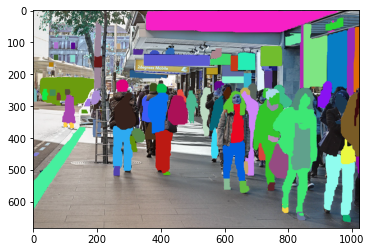

In [152]:
import matplotlib.pyplot as plt
plt.imshow(image_with_masks)

In [153]:
cv2.imwrite("obj.png", image_with_masks)

True

In [4]:
pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 KB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 KB 5.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade tqdm

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.40.0
    Uninstalling tqdm-4.40.0:
      Successfully uninstalled tqdm-4.40.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scrapegraphai 1.6.0 requires langchain==0.1.15, but you have langchain 0.2.4 which is incompatible.
scrapegraphai 1.6.0 requires tiktoken==0.6.0, but you have tiktoken 0.7.0 which is incompatible.
langchain-openai 0.1.6 requires langchain-core<0.2.0,>=0.1.46, but you have langchain-core 0.2.6 which is incompatible.
fastrag 3.0.0 requires chainlit==1.0.506, but you have chainlit 1.1.0 which is incompatible.
fastrag 3.0.0 requires protobuf==3.20.2, but you have protobuf 4.25.3 which is incompatible.
fastrag 3.0.0 requires sentence-transformers=

In [7]:
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModel
import torch
from tqdm import tqdm as tqdm

model = AutoModel.from_pretrained("google/siglip-base-patch16-256-i18n")
processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-256-i18n")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

texts = ["a photo of 2 cats", "a photo of 2 dogs"]
inputs = processor(text=texts, images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = torch.sigmoid(logits_per_image) # these are the probabilities
print(f"{probs[0][0]:.1%} that image 0 is '{texts[0]}'")

0.0% that image 0 is 'a photo of 2 cats'


In [8]:
inputs['input_ids'].shape

torch.Size([2, 8])